In [1]:
from qiskit import *
from qiskit.visualization import plot_state_city

In [2]:
# Enigme : la porte au trésor
'''
un trésor se cache derrière une des 2 portes
un gardien est devant chaque porte, l'un ment l'autre dit la vérité mais on ne sait pas lequel
La question a poser pour résoudre cette éngime est la suivante :
Quelle porte l'autre gardien me dirait de ne pas prendre ?
'''

"\nun trésor se cache derrière une des 2 portes\nun gardien est devant chaque porte, l'un ment l'autre dit la vérité mais on ne sait pas lequel\nLa question a poser pour résoudre cette éngime est la suivante :\nQuelle porte l'autre gardien me dirait de ne pas prendre ?\n"

E:\Documents\julian ecole\ESGI\5 année\quantique\venv\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


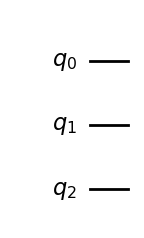

In [3]:
# On commence par implémenter l'énigme de départ
# On a besoin de 3 qubits => 2 qui vont correspondre à la réponse des 2 gardiens et 1 autre qui indique quelle gardien ment
circ = QuantumCircuit(3)
circ.draw('mpl')

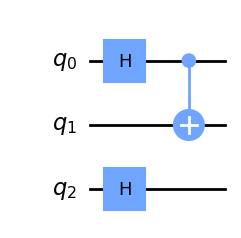

In [4]:
# Les qubits étant initialisés à 0, il faut appliquer une porte hadamard afin de superposé l'état 0 et 1 afin que l'on ne sache pas "dérrière quelle porte se trouve le trésor"
# A partir du moment ou on ouvre une porte on connait tout de suite le résultat de l'autre porte, on va donc intriquer les 2 premiers qubits avec la porte CNOT afin que les 2 qubits donnent le même résultat
# De même pour le qubit du mensonge, on ne sait pas quel gardien ment donc on va appliquer la porte hadamard pour superposer les états 0 et 1
circ.h(0)
circ.cx(0,1)
circ.h(2)
circ.draw('mpl')

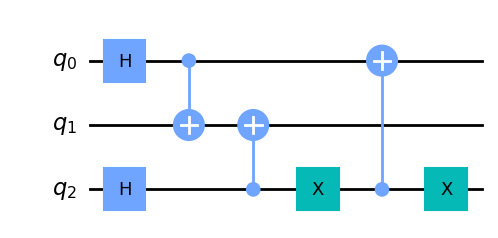

In [5]:
# Maintenant on veut inverser la réponse du gardien qui ment => circuit du mensonge
# CNOT inverse la réponse si le qubit vaut 1 et ne fait rien s'il vaut 0, on va dire que si q2 = 1 alors q1 ment et si q2 = 0 c'est q0 qui ment
circ.cx(2,1)
# On inverse la valeur de q2
circ.x(2)
circ.cx(2,0)
# On inverse à nouveau pour retrouver la valeur de départ et savoir quel gardien a menti lorsqu'on effectuera la mesure
circ.x(2)
circ.draw('mpl')

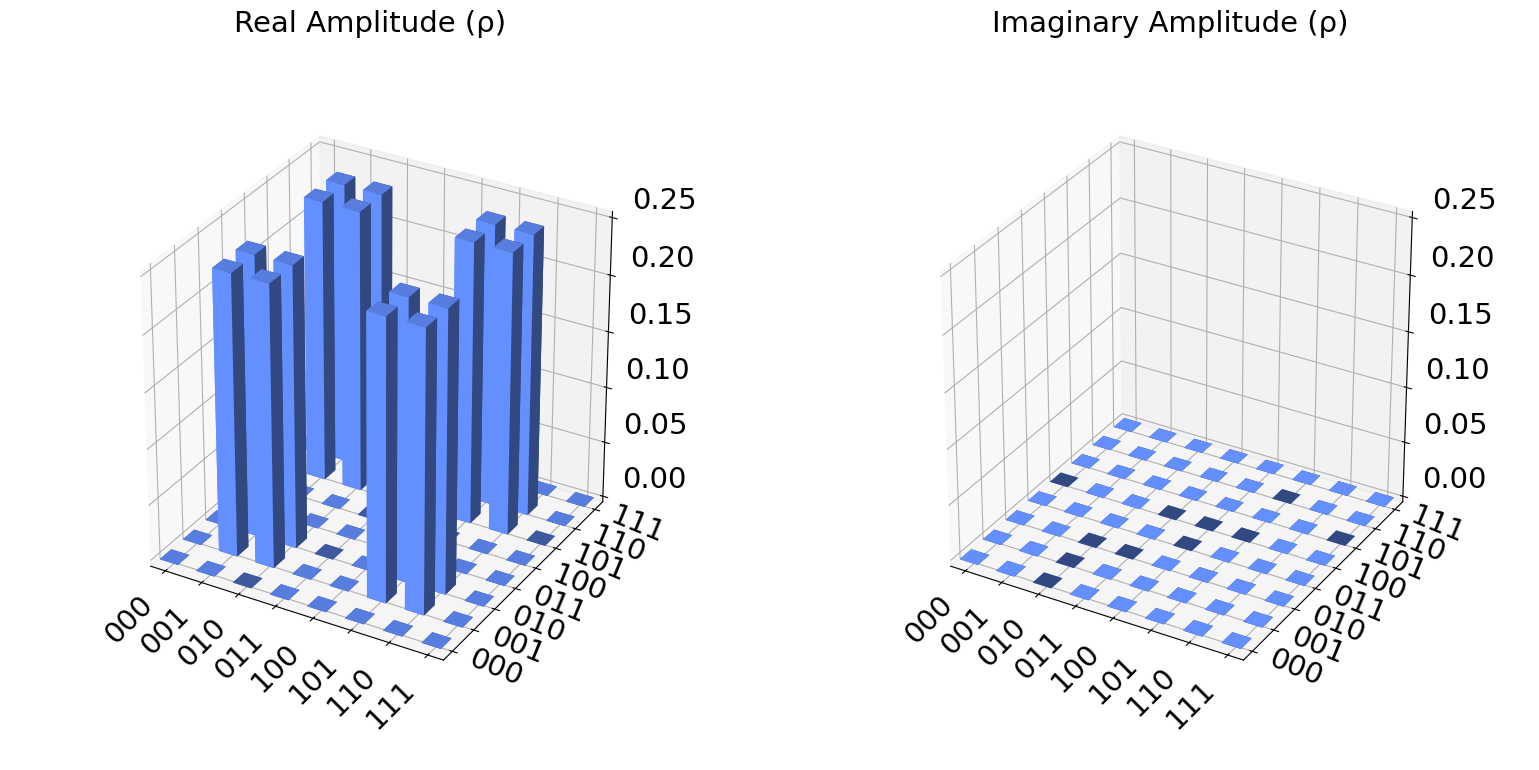

In [6]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
plot_state_city(outputstate)
# On a 4 possibilités : 2 possbilités pour le trésor * 2 possibilités de mensonge avec un résultat inverse pour les 2 gardiens (q0 et q1)

E:\Documents\julian ecole\ESGI\5 année\quantique\venv\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


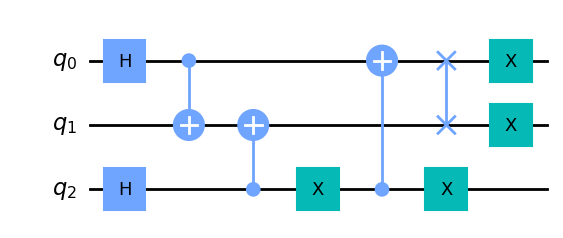

In [7]:
# Maintenant on va implémenter la résolution de l'énigme
# On rappelle la question à poser : Quelle porte l'autre gardien me dirait de ne pas prendre ?
# On va donc utiliser la porte swap pour récupérer la réponse de l'autre gardien auquelle on applique la porte NOT pour avoir la réponse à quelle porte ne pas prendre
circ.swap(0, 1)
circ.x(0)
circ.x(1)
circ.draw('mpl')

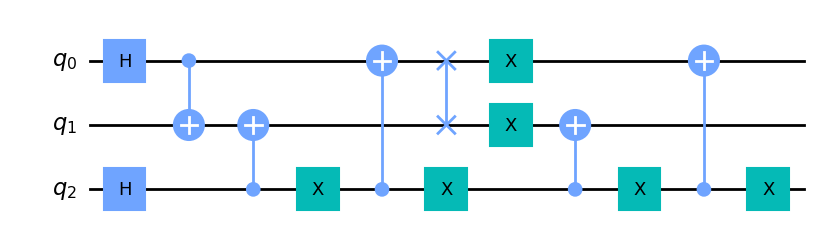

In [8]:
# Le faite de demander au gardien d'interroger l'autre gardien déclenche à nouveau le circuit du mensonge ce qui nous permet au final de l'annuler en l'implémentant une nouvelle fois
circ.cx(2,1)
# On inverse la valeur de q2
circ.x(2)
circ.cx(2,0)
# On inverse à nouveau pour retrouver la valeur de départ et savoir quel gardien a menti lorsqu'on effectuera la mesure
circ.x(2)
circ.draw('mpl')

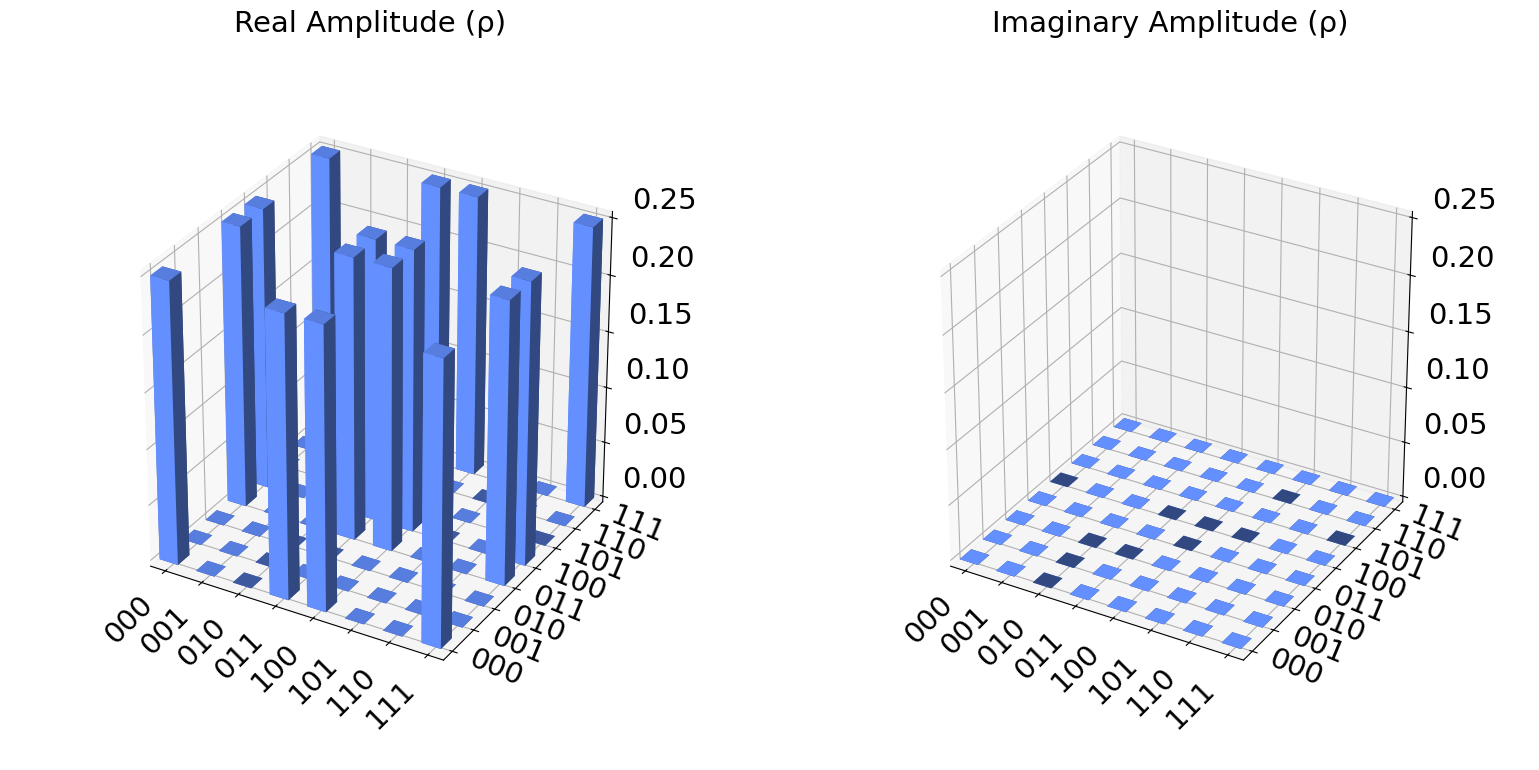

In [9]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
plot_state_city(outputstate)
# On a toujours 4 possibilités : 2 possbilités pour le trésor * 2 possibilités de mensonge avec un résultat inverse pour les 2 gardiens (q0 et q1)
# Mais cette fois ci les 2 gardiens q0 et q1 donne le même résultat